In [1]:
import scarlet
import galsim
from astropy import wcs as WCS
import time
from mr_tools import galsim_compare_tools as gct

This notebook allows quick visualisation of the results of the interpolation scheme in scarlet and in galsim.

In [2]:
%pylab inline
# Setup: declaring survey properties, loading catalog and making sure we have pretty colorbars
data_dir='/Users/remy/Desktop/LSST_Project/GalSim/examples/data'

HST, EUCLID, ROMAN, HSC, RUBIN = gct.load_surveys()

cat = galsim.COSMOSCatalog(dir=data_dir, file_name = 'real_galaxy_catalog_23.5_example.fits')

mymap = 'gnuplot2'#mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
matplotlib.rc('image', cmap='gist_stern')
matplotlib.rc('image', interpolation='none')

Populating the interactive namespace from numpy and matplotlib


Scarlet timing
CPU times: user 54.3 ms, sys: 10.8 ms, total: 65 ms
Wall time: 39.9 ms
Galsim timing
CPU times: user 136 ms, sys: 41.3 ms, total: 178 ms
Wall time: 30.4 ms
scarlet SDR:  20.37092962738854
galsim SDR:  19.89959519046018


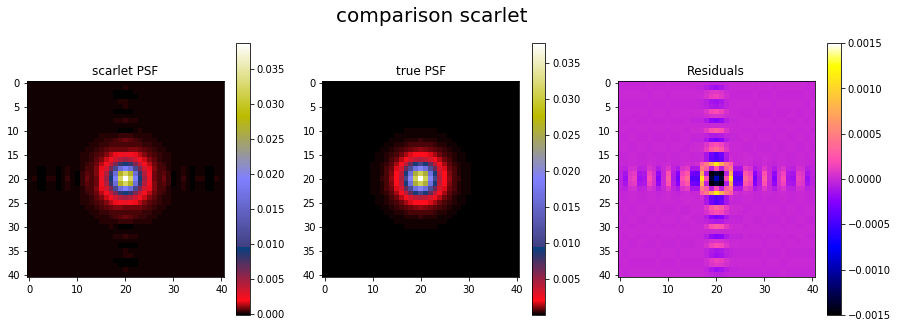

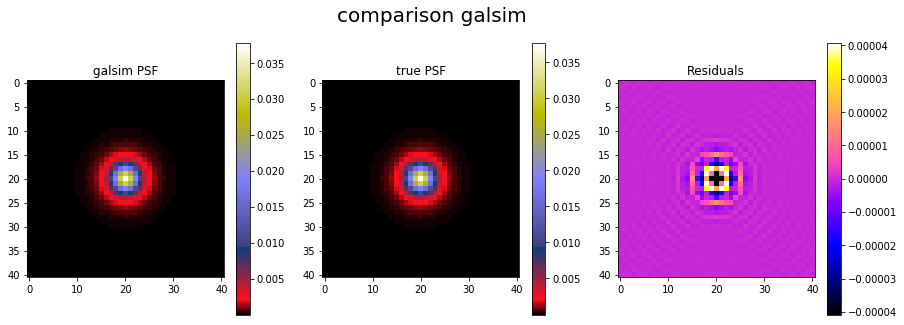

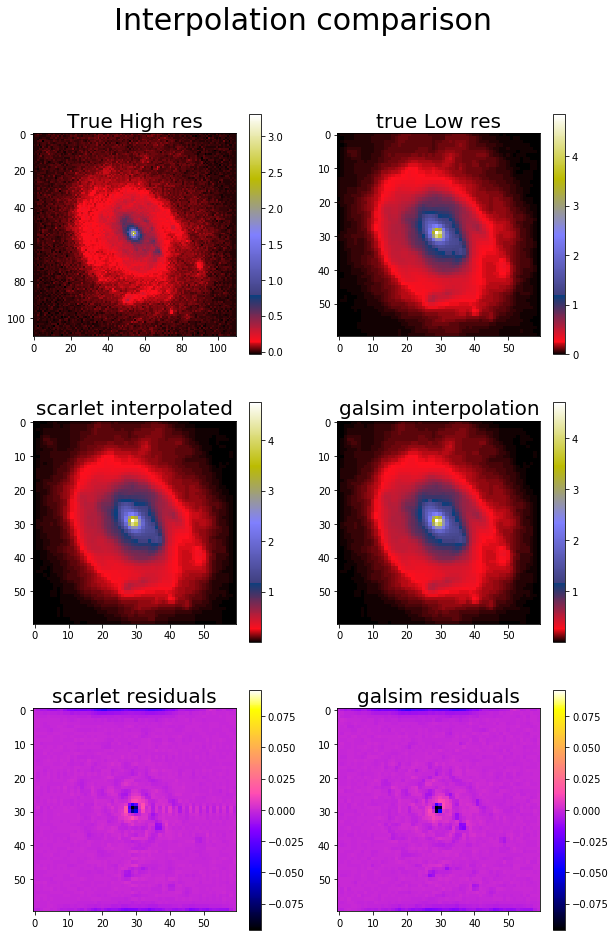

Scarlet timing
CPU times: user 120 ms, sys: 41.1 ms, total: 161 ms
Wall time: 72.6 ms
Galsim timing
CPU times: user 67.7 ms, sys: 13.2 ms, total: 80.9 ms
Wall time: 13.5 ms
scarlet SDR:  22.322059494647732
galsim SDR:  21.58798675247049


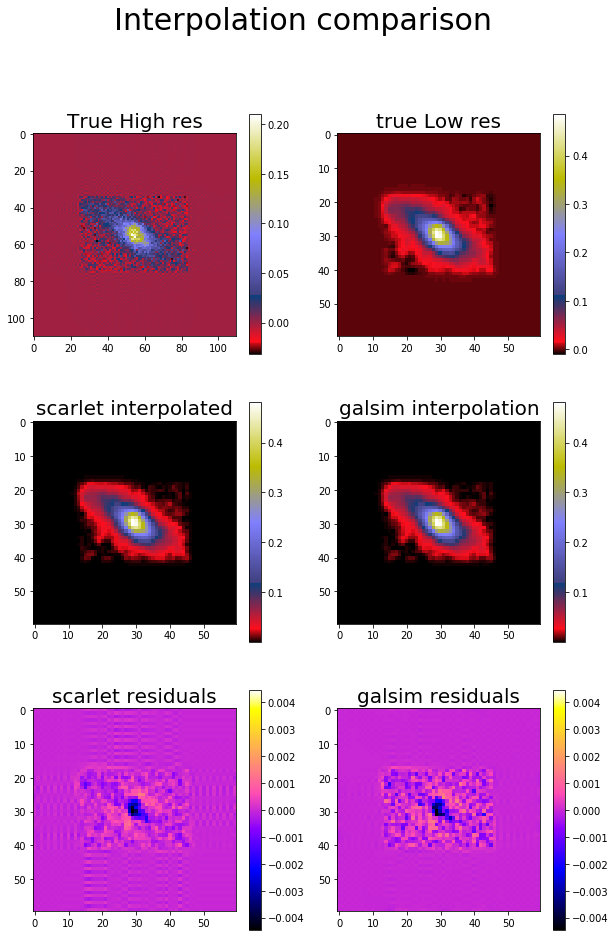

Scarlet timing
CPU times: user 103 ms, sys: 35 ms, total: 138 ms
Wall time: 62.1 ms
Galsim timing
CPU times: user 70 ms, sys: 14.3 ms, total: 84.3 ms
Wall time: 14.1 ms
scarlet SDR:  17.86398017536602
galsim SDR:  17.137198839172044


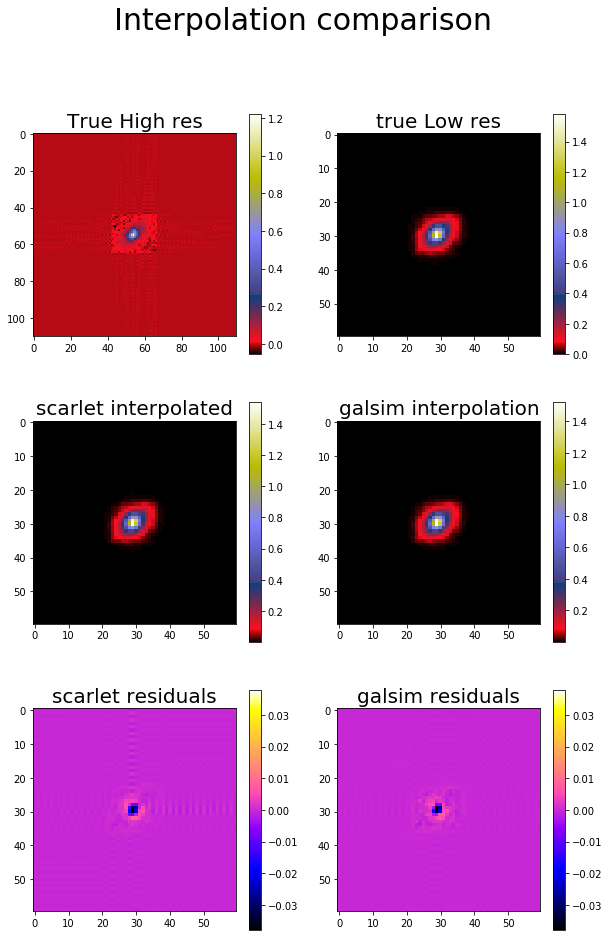

Scarlet timing
CPU times: user 101 ms, sys: 36.9 ms, total: 138 ms
Wall time: 63.9 ms
Galsim timing
CPU times: user 76.7 ms, sys: 20.6 ms, total: 97.3 ms
Wall time: 16.7 ms
scarlet SDR:  20.248806877568843
galsim SDR:  19.517622020839163


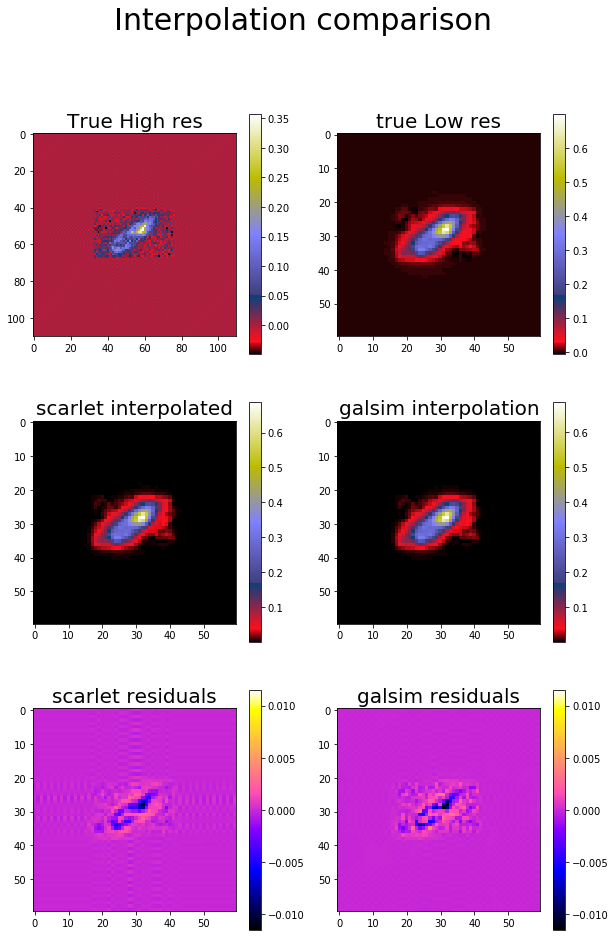

Scarlet timing
CPU times: user 104 ms, sys: 35.6 ms, total: 140 ms
Wall time: 62.2 ms
Galsim timing
CPU times: user 70.3 ms, sys: 14.3 ms, total: 84.6 ms
Wall time: 14.2 ms
scarlet SDR:  19.187911929167544
galsim SDR:  18.409350668380313


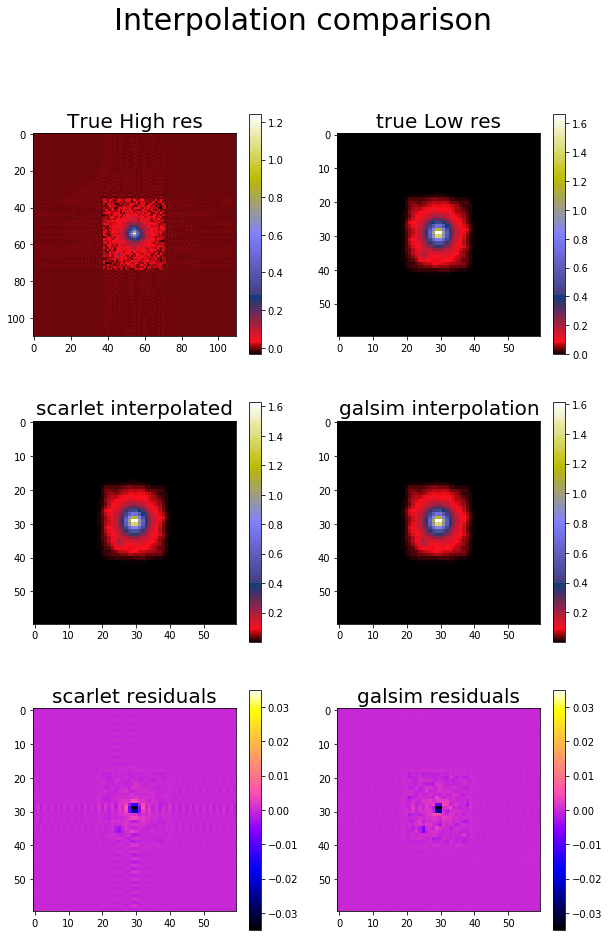

Scarlet timing
CPU times: user 104 ms, sys: 36.7 ms, total: 141 ms
Wall time: 63.6 ms
Galsim timing
CPU times: user 76.4 ms, sys: 17.8 ms, total: 94.2 ms
Wall time: 16 ms
scarlet SDR:  19.977229266467972
galsim SDR:  19.060591222037694


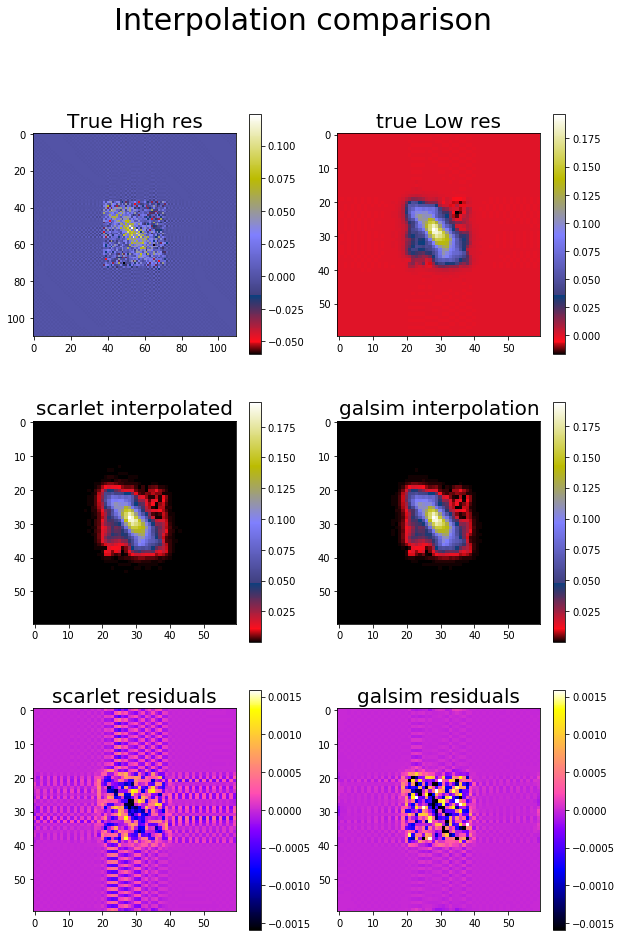

Scarlet timing
CPU times: user 107 ms, sys: 36.2 ms, total: 143 ms
Wall time: 63.7 ms
Galsim timing
CPU times: user 70.5 ms, sys: 14.4 ms, total: 84.9 ms
Wall time: 14.2 ms
scarlet SDR:  16.676692044192553
galsim SDR:  15.718004240230652


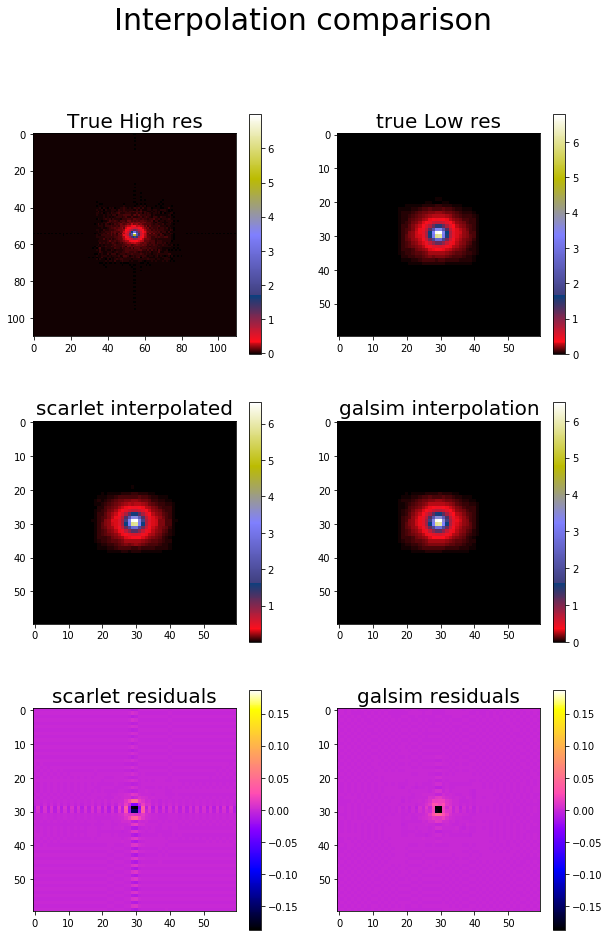

Scarlet timing
CPU times: user 103 ms, sys: 35.4 ms, total: 139 ms
Wall time: 61.7 ms
Galsim timing
CPU times: user 70.5 ms, sys: 14.5 ms, total: 85 ms
Wall time: 14.3 ms
scarlet SDR:  19.647401976067506
galsim SDR:  19.034552610639654


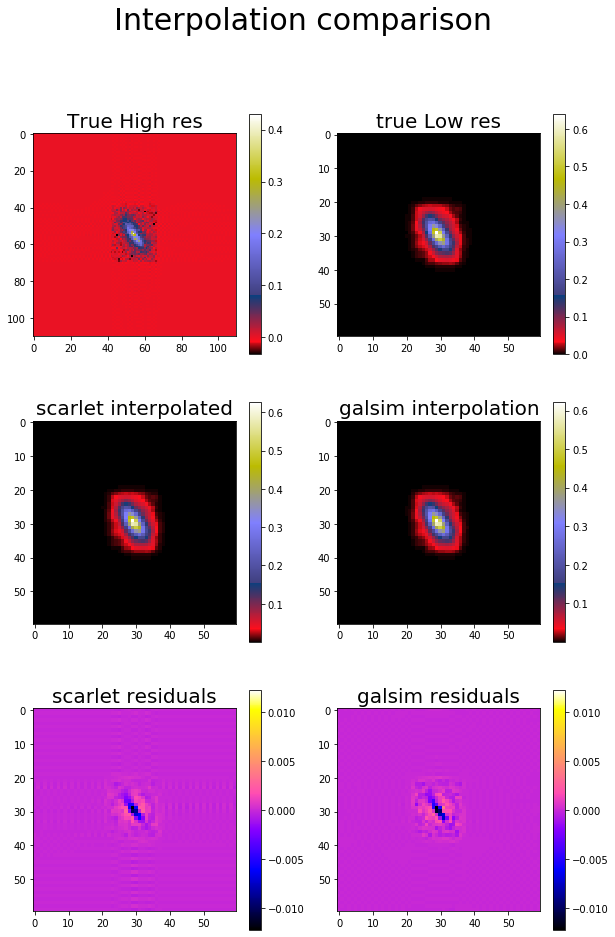

Scarlet timing
CPU times: user 106 ms, sys: 37.6 ms, total: 144 ms
Wall time: 63.1 ms
Galsim timing
CPU times: user 70 ms, sys: 14.4 ms, total: 84.4 ms
Wall time: 14.1 ms
scarlet SDR:  24.043256498041245
galsim SDR:  23.58106990921682


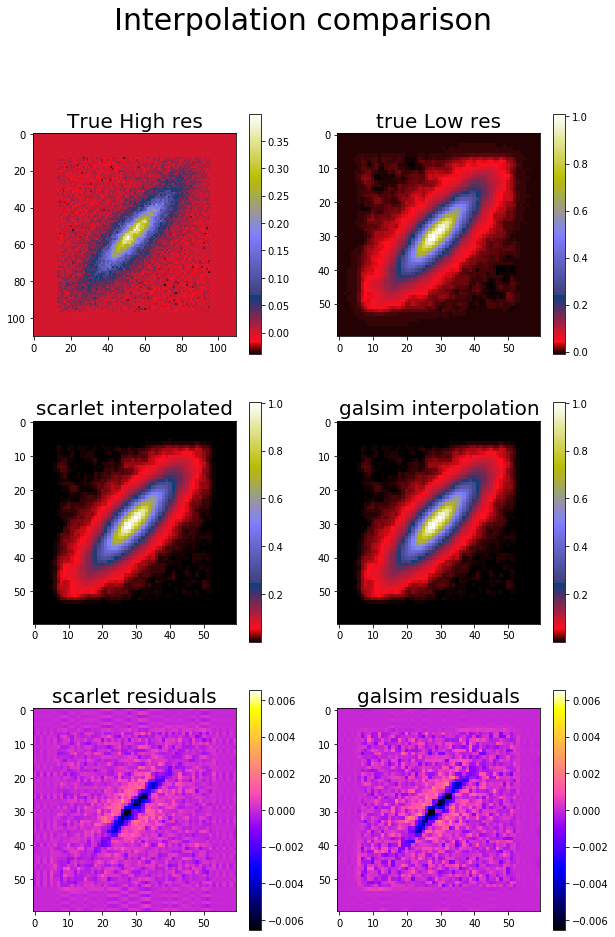

Scarlet timing
CPU times: user 107 ms, sys: 39.7 ms, total: 147 ms
Wall time: 67.7 ms
Galsim timing
CPU times: user 77.4 ms, sys: 25.1 ms, total: 102 ms
Wall time: 18.2 ms
scarlet SDR:  19.775523500799526
galsim SDR:  19.019857506976937


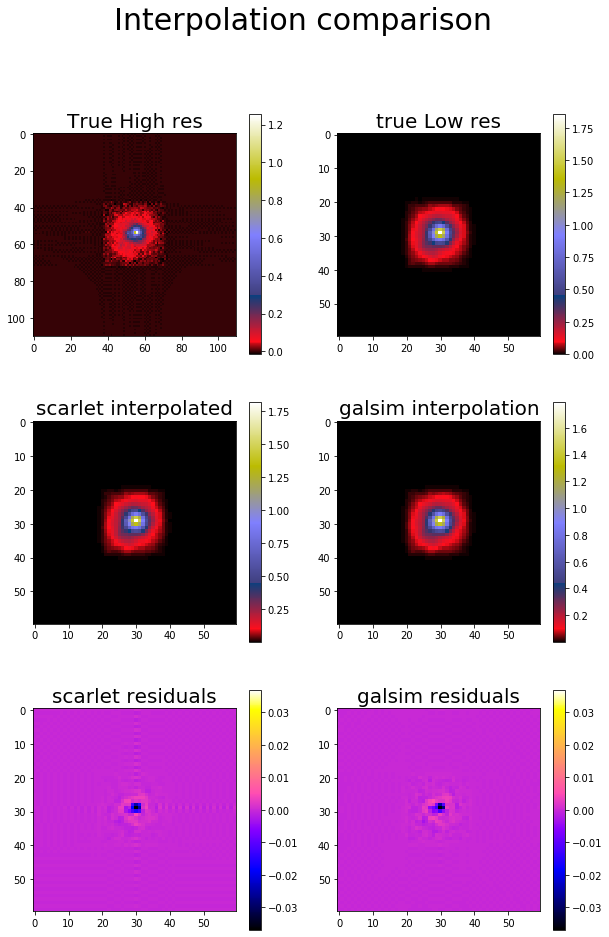

Scarlet timing
CPU times: user 113 ms, sys: 38.7 ms, total: 152 ms
Wall time: 67.2 ms
Galsim timing
CPU times: user 72.3 ms, sys: 14.7 ms, total: 86.9 ms
Wall time: 14.6 ms
scarlet SDR:  21.79217433724304
galsim SDR:  20.72368665785651


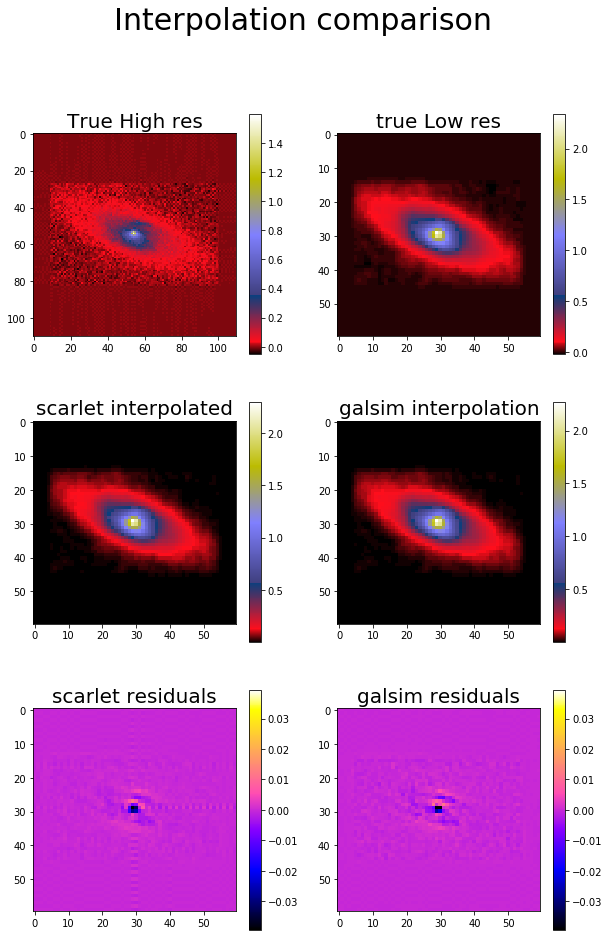

In [3]:
# Choose to surveys to match
survey_hr = HST
survey_lr = ROMAN

# PSF size (pixels)
npsf = 41

# Size of the high resolution image (pixels)
n_hr = 131

# The low resolution image will span the same physical area
n_lr = 60#np.int(n_hr*survey_hr['pixel']/survey_lr['pixel'])+1
n_hr = np.int(np.around(n_lr*survey_lr['pixel']/survey_hr['pixel'], decimals = 3))

# Channel names (scarlet-specific)
channel_hr = ['hr']
channel_lr = ['lr']
channels = channel_lr+channel_hr
c = 0
for i in range(39,50):    #[79,88]:#
    # Make the simulations
    data_hr, data_lr, psf_hr, psf_lr, angle = gct.mk_sim(i, survey_hr, survey_lr, (n_hr, n_hr), (n_lr, n_lr), npsf, cat)
    
    # Setup scarlet
    if c == 0:
        obs_lr, obs_hr = gct.setup_scarlet(data_hr, data_lr, psf_hr, psf_lr, channels, 'intersection')

    # Galsim setup:
    ## Interpolated image from psf_hr for galsim
    psf_hr_galsim = galsim.InterpolatedImage(galsim.Image(psf_hr[0]), 
                                               scale = survey_hr['pixel'])
    ## Deconvolution kernel for diff kernel
    deconv = galsim.Deconvolve(psf_hr_galsim)
    
    ## Interpolation of low resolution psf at high resolution from galsim
    psf_lr_hr = galsim.InterpolatedImage(galsim.Image(psf_lr[0]), 
                                               scale = survey_lr['pixel'])
    ## Difference kernel from galsim
    diff_gal = galsim.Convolve(deconv, psf_lr_hr)
    
    # Run scarlet on simulations:
    print('Scarlet timing')
    %time obs_lr.render(data_hr.array[None,:,:])
    interp_scar = obs_lr.render(data_hr.array[None,:,:])
    #interp_scar[interp_scar<0] = 0

    # Difference kernel from scarlet (for sanity checks)
    diff_scar = obs_lr._diff_kernels
    
    # Run galsim on simlations
    print('Galsim timing')
    %time  gct.interp_galsim(data_hr, data_lr, diff_gal, angle, survey_hr['pixel'], survey_lr['pixel'])
    interp_gal = gct.interp_galsim(data_hr, data_lr, diff_gal, angle, survey_hr['pixel'], survey_lr['pixel'])
    
    # Check on the reconstruction of the PSF
    ## Reconstruction of the low resolution psf by galsim from hr psf and diff kernel (sanity check)
    rec_gal = galsim.Convolve(diff_gal, psf_hr_galsim).drawImage(nx=npsf,ny=npsf, scale=survey_hr['pixel'])
    
    ## True psf
    gal_lr = galsim.InterpolatedImage(galsim.Image(psf_lr[0]), 
                                      scale=survey_lr['pixel']).drawImage(nx=npsf,ny=npsf,scale=survey_hr['pixel']
                                                                         , method = 'real_space')
    
    ## Reconstruction of the low resolution psf by SCARLET from hr psf and diff kernl (sanity check)
    rec_scar = scarlet.fft.convolve(scarlet.fft.Fourier(psf_hr[0]), scarlet.fft.Fourier(diff_scar.image[0]))
    
    if c == 0:
        # Comparisonbetween scarlet and galsim of the reconstruction of the low resolution PSF at high resolution 
        r_scar=(gal_lr.array-rec_scar.image)
        figure(figsize = (15,5))
        plt.suptitle('comparison scarlet', fontsize = 20)
        subplot(131)
        title('scarlet PSF')
        imshow((rec_scar.image))
        plt.colorbar()
        subplot(132)
        title('true PSF')
        imshow((gal_lr.array))
        plt.colorbar()
        subplot(133)
        title('Residuals')
        imshow((r_scar), cmap = mymap, 
               vmin = -np.max(np.abs(r_scar)), vmax = np.max(np.abs(r_scar)))
        plt.colorbar()

        r_gal = (gal_lr.array-rec_gal.array)
        figure(figsize = (15,5))
        plt.suptitle('comparison galsim', fontsize = 20)
        subplot(131)
        title('galsim PSF')
        imshow((rec_gal.array))
        plt.colorbar()
        subplot(132)
        title('true PSF')
        imshow((gal_lr.array))
        plt.colorbar()
        subplot(133)
        title('Residuals')
        imshow((r_gal), cmap = mymap, 
               vmin = -np.max(np.max(r_gal)), vmax = np.max(np.max(r_gal)))
        plt.colorbar()
    
    # Source Distortion Ratio: the high the better
    print('scarlet SDR: ', gct.SDR(data_lr.array, interp_scar[0]))
    print('galsim SDR: ', gct.SDR(data_lr.array, interp_gal.array))
    
    # Comparison of the reconstructions 
    gal_res = data_lr.array-interp_gal.array
    scar_res = data_lr.array-interp_scar[0]
    figure(figsize = (10,15))
    plt.suptitle('Interpolation comparison', fontsize=30)
    subplot(321)
    title('True High res', fontsize = 20)
    imshow((data_hr.array))
    plt.colorbar()
    subplot(322)
    title('true Low res', fontsize = 20)
    imshow((data_lr.array))
    plt.colorbar()
    subplot(323)
    title('scarlet interpolated', fontsize = 20)
    imshow(np.abs(interp_scar[0]))
    plt.colorbar()
    subplot(324)
    title('galsim interpolation', fontsize = 20)
    imshow(np.abs(interp_gal.array))
    plt.colorbar()
    subplot(325)
    title('scarlet residuals', fontsize = 20)
    imshow(-(scar_res), cmap=mymap, vmin = -np.max(np.abs(scar_res)), vmax = np.max(np.abs(scar_res)))
    plt.colorbar()
    subplot(326)
    title('galsim residuals', fontsize = 20)
    imshow(-(gal_res), cmap=mymap, vmin = -np.max(np.abs(scar_res)), vmax = np.max(np.abs(scar_res)))
    plt.colorbar()
    show()
    
    c+=1
